# **Analyzing Performance of Supermarket Changes: A Quantium Analytics Project**

## Data preparation and customer analytics

In [ ]:
## install required libraries
# !pip install openpyxl
# !pip install nbconvert

In [ ]:
# import libraries
import openpyxl
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import re
import plotly.express as px


Using the openpyxl.load_workbook() function, selected the active worksheet using the workbook.active property, and printed the value of the cell A1 using the worksheet['A1'].value syntax.

In [ ]:
# # Load the workbook
# from google.colab import drive
# drive.mount('/content/drive')
workbook = openpyxl.load_workbook('/content/drive/MyDrive/Colab Notebooks/QVI_transaction_data.xlsx')

# Select the worksheet
worksheet = workbook.active


### Read Data

use pandas.read_excel() function to read the csv file

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/QVI_transaction_data.xlsx')

df.head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [ ]:
df.shape

(264836, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Evaluating for Missing Data


The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data

In [ ]:

missing_data = df.isnull()
missing_data.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


### Count missing values in each column

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

DATE
False    264836
Name: DATE, dtype: int64

STORE_NBR
False    264836
Name: STORE_NBR, dtype: int64

LYLTY_CARD_NBR
False    264836
Name: LYLTY_CARD_NBR, dtype: int64

TXN_ID
False    264836
Name: TXN_ID, dtype: int64

PROD_NBR
False    264836
Name: PROD_NBR, dtype: int64

PROD_NAME
False    264836
Name: PROD_NAME, dtype: int64

PROD_QTY
False    264836
Name: PROD_QTY, dtype: int64

TOT_SALES
False    264836
Name: TOT_SALES, dtype: int64



# Correct data formats

Give columns a descriptive name

In [ ]:

# rename columns
df = df.rename(
    columns={
        'DATE': 'date',
        'STORE_NBR': 'store_number', 
        'LYLTY_CARD_NBR': 'loyalty_card_number', 
        'TXN_ID': 'transaction_ID',
        'PROD_NBR': 'product_number',
        'PROD_NAME': 'product_name',
        'PROD_QTY': 'product_quantity',
        'TOT_SALES': 'total_sales'
        }
    )

# print the updated dataframe
df

,date,store_number,loyalty_card_number,transaction_ID,product_number,product_name,product_quantity,total_sales
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8



Convert the **Date** column to datetime format

In [ ]:

import datetime 

def Excel5DigitsDate_to_Date(FiveDigitsDate):
    """
    This function will convert the Excel Date consisting of five digits to yyyy-mm-dd format.
    """
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(FiveDigitsDate < 60):
        delta_in_days = datetime.timedelta(days = (FiveDigitsDate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (FiveDigitsDate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

# Convert DATE column to datetime format
df['date'] = df['date'].apply(Excel5DigitsDate_to_Date)

df['date'].head()


0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: date, dtype: datetime64[ns]

In [ ]:
#Let's list the data types for each column
print(df.dtypes)



date                   datetime64[ns]
store_number                    int64
loyalty_card_number             int64
transaction_ID                  int64
product_number                  int64
product_name                   object
product_quantity                int64
total_sales                   float64
dtype: object


To check if you are looking at the right products by examining the Product_name column in Python, you can use the unique() method to view all unique values in the column. 

In [ ]:
# View all unique product names in the dataset
unique_products = df['product_name'].unique()

# Print the dataframe
unique_products

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Let's only get product related to chips as we are only interested potatoe chips.

There are salsa products in the dataset but we are only interested in the chips 
category, so let's remove these

In [ ]:
# Filter out rows containing "salsa" in the product_name column
df = df[~df['product_name'].str.contains('salsa', case=False)]

# Reset the index of the filtered dataframe
df = df.reset_index(drop=True)
print("Removed salsa products")
df.shape



Removed salsa products


(246742, 8)

In [ ]:
df.head(20)

,date,store_number,loyalty_card_number,transaction_ID,product_number,product_name,product_quantity,total_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


### Deriving pack size

We can extract the pack size information from the "product_name" column in the transaction data.

In [ ]:
# extract pack size from chip_products
df['pack_size'] = df['product_name'].str.extract('(\d+)')

df['pack_size']


0         175
1         175
2         170
3         175
4         150
         ... 
246737    175
246738    175
246739    170
246740    150
246741    175
Name: pack_size, Length: 246742, dtype: object

The pack_size Column has a string data type and needs to be converted to numeric.


In [ ]:
#convert data type
df['pack_size'] = pd.to_numeric(df['pack_size'])
df['pack_size'].dtypes

dtype('int64')

We can use the describe function to get some summary statistics on the pack_size column to check if there are any obvious issues with the values

In [ ]:
print(df['pack_size'].describe())


count    246742.000000
mean        175.585178
std          59.434727
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: pack_size, dtype: float64


This outputs statistics such as the count, mean, standard deviation, minimum and maximum values, and quartiles for the pack_size column. We can use this information to identify any outliers or unexpected values.

 ### Let's plot a histogram of *pack_size* since we know that 


it is a categorical variable and not a continuous variable even though it is numeric.





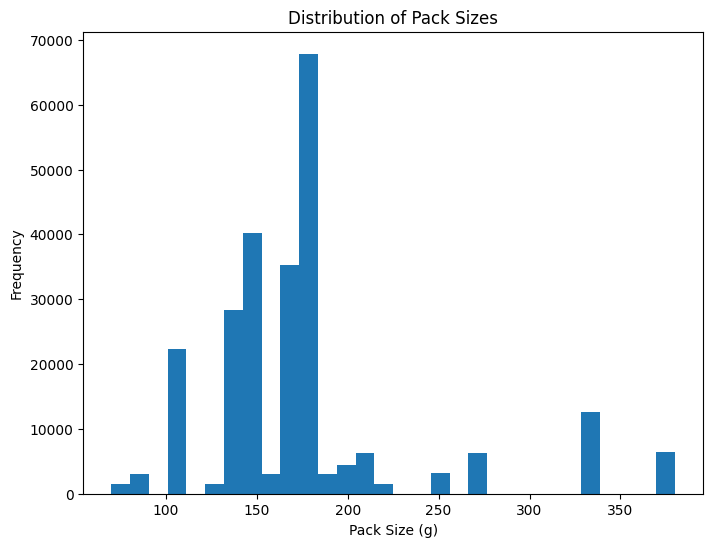

In [ ]:
# Plot a histogram showing the number of transactions by pack size.
plt.figure(figsize=(8, 6))

# Create a histogram of pack sizes
plt.hist(df['pack_size'], bins=30)

# Add labels and title
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Pack Sizes')

# Show the plot
plt.show()


Pack sizes created look reasonable and now to create brands, we can use the first word in Product Name to work out the brand name

### Deriving brand name


We can extract the brand name information from the **Chip_Products** column 

In [ ]:
df['product_name'].value_counts


<bound method IndexOpsMixin.value_counts of 0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
246737     Kettle Sweet Chilli And Sour Cream 175g
246738               Tostitos Splash Of  Lime 175g
246739                    Doritos Mexicana    170g
246740     Doritos Corn Chip Mexican Jalapeno 150g
246741               Tostitos Splash Of  Lime 175g
Name: product_name, Length: 246742, dtype: object>


Extract brand name from product name


In [ ]:
# extract brand name from product name
df['brand_name'] = df['product_name'].str.split().str[0]

df['brand_name']



0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
246737      Kettle
246738    Tostitos
246739     Doritos
246740     Doritos
246741    Tostitos
Name: brand_name, Length: 246742, dtype: object

let's Remove digits, and special characters

In [ ]:
def extract_chip_products(text):
    # if type(text) != str: # This will ensure that the function always returns a string, even if the input is not a string.
    #     return ''
    
    # Remove special characters '&' and '/'
    text = re.sub('[&/]', ' ', text)
    text = re.sub('\d\w*', ' ', text) # Remove product weights
    
    return text


# Apply text cleaning function to chip_products column
df['product_name'] = df['product_name'].apply(extract_chip_products)
df.head()

,date,store_number,loyalty_card_number,transaction_ID,product_number,product_name,product_quantity,total_sales,pack_size,brand_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [ ]:
#We need to rename some brands here as they have the same names.
df['brand_name'].replace('Natural', 'NCC', inplace = True)
df['brand_name'].replace('CCs', 'CCS', inplace = True)
df['brand_name'].replace('Smith', 'Smiths', inplace = True)
df['brand_name'].replace(['Grain', 'Grnwves', 'GrnWves'], 'Grainwaves', inplace = True)
df['brand_name'].replace('Dorito', 'Doritos', inplace = True)
df['brand_name'].replace('WW', 'Woolworths', inplace = True)
df['brand_name'].replace('Infzns', 'Infuzions', inplace = True)
df['brand_name'].replace(['Red', 'Rrd', 'RRD'], 'Red Rock Deli', inplace = True)
df['brand_name'].replace('Snbts', 'Sunbites', inplace = True)

print(df['brand_name'].unique())



['NCC' 'CCS' 'Smiths' 'Kettle' 'Grainwaves' 'Doritos' 'Twisties'
 'Woolworths' 'Thins' 'Burger' 'Cheezels' 'Infuzions' 'Red Rock Deli'
 'Pringles' 'Tyrrells' 'Cobs' 'French' 'Tostitos' 'Cheetos' 'Sunbites']


In [ ]:

df['product_name'] = df['product_name'].str.replace('Chip',  'Chips')
df['product_name'] = df['product_name'].str.replace('Chp', 'Chips')
df['product_name'] = df['product_name'].str.replace('Chipss', 'Chips')

df.head(20)

,date,store_number,loyalty_card_number,transaction_ID,product_number,product_name,product_quantity,total_sales,pack_size,brand_name
0,2018-10-17,1,1000,1,5,Natural Chips Compny SeaSalt,2,6.0,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny Jlpno Chili,3,13.8,150,Kettle
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330,Smiths
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210,Grainwaves
7,2018-08-20,5,5026,4525,42,Doritos Corn Chips Mexican Jalapeno,1,3.9,150,Doritos
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream Chives,2,7.2,210,Grainwaves
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330,Smiths


Let's look at the most common words by counting the number of times a word 
appears and sorting them by this frequency in order of highest to lowest frequency

In [ ]:
# Define the dataframe and column containing the text
df1 = df['product_name']

# Extract the text as a list of strings
text_list = df1.astype(str).tolist()

# Combine the text into a single string
text = ' '.join(text_list)

# Convert text to lowercase
text = text.lower()

# Split the text into words
words = text.split()

# Create an empty dictionary to store word frequency
freq = {}

# Iterate over each word in the list of words
for word in words:
    # If the word is already in the dictionary, increase its count by 1
    if word in freq:
        freq[word] += 1
    # Otherwise, add the word to the dictionary with a count of 1
    else:
        freq[word] = 1

# Sort the dictionary by values (i.e., word frequency) in descending order
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

# Print the sorted word frequency
for word, count in sorted_freq:
    print(f"{word}: {count}")


chips: 71600
kettle: 41288
salt: 27976
cheese: 27890
smiths: 27390
pringles: 25102
crinkle: 22490
corn: 22063
doritos: 22041
original: 21560
cut: 19284
chicken: 18577
cream: 16926
chilli: 15390
sea: 14145
thins: 14075
sour: 13882
crisps: 12607
vinegar: 12402
rrd: 11894
sweet: 11060
infuzions: 11057
supreme: 10963
chives: 10951
ww: 10320
cobs: 9693
popd: 9693
tortilla: 9580
tostitos: 9471
twisties: 9454
bbq: 9434
sensations: 9429
lime: 9347
swt: 7987
thinly: 7507
tyrrells: 6442
and: 6373
tangy: 6332
sourcream: 6296
grain: 6272
waves: 6272
lightly: 6248
salted: 6248
soy: 6121
onion: 6116
natural: 6050
sr: 4795
thai: 4737
burger: 4733
honey: 4661
nacho: 4658
potato: 4647
cheezels: 4603
garlic: 4572
ccs: 4551
red: 4427
rock: 4427
deli: 4427
mozzarella: 3304
basil: 3304
pesto: 3304
chipshny: 3296
jlpno: 3296
chili: 3296
chlli: 3269
ched: 3268
pot: 3257
splash: 3252
of: 3252
sweetchili: 3242
potatomix: 3242
crnkle: 3233
orgnl: 3233
big: 3233
bag: 3233
hot: 3229
spicy: 3229
camembert: 3219
fi

### Summary Statistics

In [ ]:
# Use describe to get summary statistics for numerical columns
df.describe()

,store_number,loyalty_card_number,transaction_ID,product_number,product_quantity,total_sales,pack_size
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,175.585178
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,59.434727
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


### Outliers

There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.


In [ ]:
# check for unique values
print(df['product_quantity'].unique())


[  2   3   5   1   4 200]


In [ ]:
df['product_quantity'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: product_quantity, dtype: int64

Investigate the transaction where 200 packets of chips were bought. We can try to find more information about this transaction, such as the date, time, and location of the transaction, and see if there are any patterns or anomalies.




In [ ]:
# We can use the loc function to filter the dataset for transactions where the quantity is 200 and then look at the other columns to get more information:
# Filter for transactions where quantity is 200
outlier = df.loc[df['product_quantity'] == 200]

# Display information about the outlier transaction
outlier


,date,store_number,loyalty_card_number,transaction_ID,product_number,product_name,product_quantity,total_sales,pack_size,brand_name
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chips Supreme,200,650.0,380,Doritos
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chips Supreme,200,650.0,380,Doritos


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.





In [ ]:
# Filter out the customer based on the loyalty card number
# Filter out transactions from the customer with the given loyalty card number
# 226000
df = df.loc[df['loyalty_card_number'] != 226000]

df.describe()



,store_number,loyalty_card_number,transaction_ID,product_number,product_quantity,total_sales,pack_size
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.




In [ ]:
# Count the number of transactions by date
trans_by_date = df.groupby('date')['transaction_ID'].count()

trans_by_date.to_frame()




,transaction_ID
date,
2018-07-01,663
2018-07-02,650
2018-07-03,674
2018-07-04,669
2018-07-05,660
...,...
2019-06-26,657
2019-06-27,669
2019-06-28,673


Create a summary of transaction count by date.

In [ ]:
# Print the summary of transaction count by date
trans_by_date.describe()

count    364.000000
mean     677.857143
std       33.687536
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
Name: transaction_ID, dtype: float64

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

Create a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019, and join it onto the data to fill in the missing day

In [ ]:

# Create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Join the two dataframes on the date column
trans_by_date = pd.DataFrame({'date': date_range}).merge(trans_by_date.reset_index(), on='date', how='left').fillna(0)

trans_by_date


,date,transaction_ID
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


Plot transactions over time


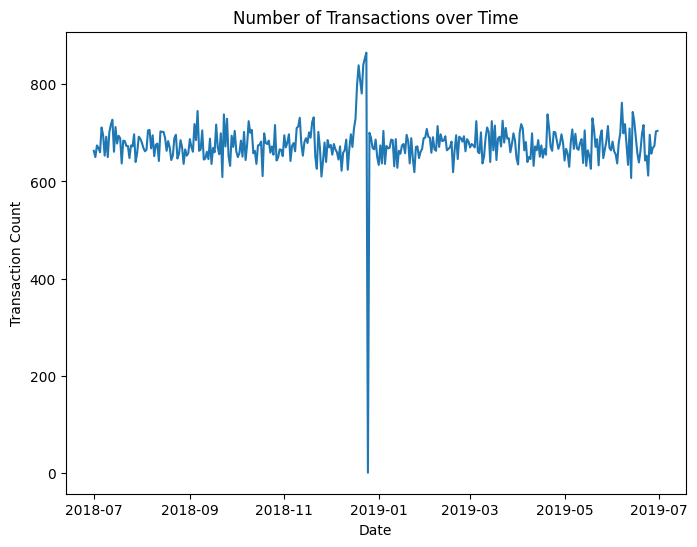

In [ ]:
# Create a line plot of the transaction count over time
plt.figure(figsize=(8,6))

plt.plot(trans_by_date['date'], trans_by_date['transaction_ID'])

# Set the title and axis labels
plt.title('Number of Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')

# Show the plot
plt.show()


We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in
on this.

Filter to December and look at individual days

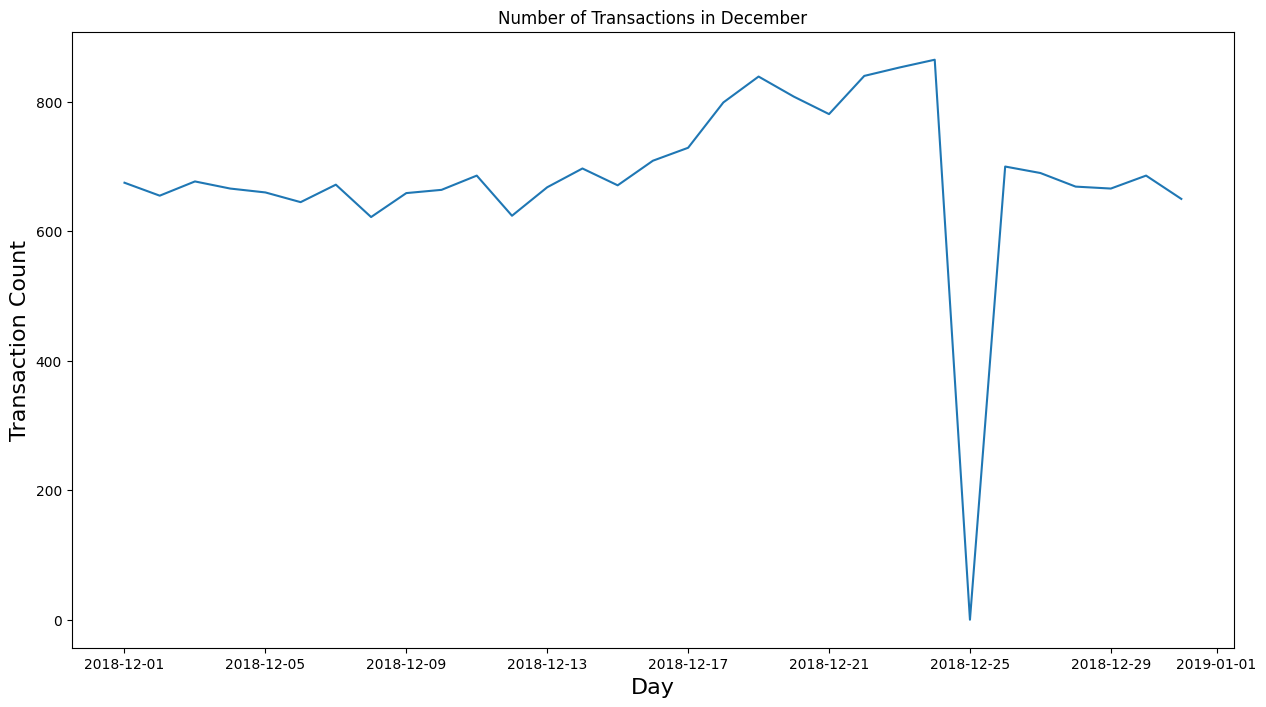

In [ ]:
# Filter to December only
december_data = trans_by_date[trans_by_date['date'].dt.month == 12]

# Create a bar plot of the transaction count for each day in December
plt.figure(figsize=(15,8))
plt.plot(december_data['date'], december_data['transaction_ID'])

# Set the title and axis labels
plt.title('Number of Transactions in December')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Transaction Count', fontsize=16)

# Show the plot
plt.show()



We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on  Christmas day.

## CUSTOMER DATA

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/QVI_purchase_behaviour.csv')

df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
df2.shape

(72637, 3)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Rename columns to appropriate names

In [ ]:
# rename columns
df2 = df2.rename(
    columns={ 
        'LYLTY_CARD_NBR': 'loyalty_card_number', 
        'LIFESTAGE': 'lifestage',
        'PREMIUM_CUSTOMER': 'premium_customer'
        }
    )

# print the updated dataframe
df2

,loyalty_card_number,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
df2['lifestage'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
# Renaming columns values for consistence
df2['lifestage'] = df2['lifestage'].str.replace('YOUNG SINGLES/COUPLES', 'Young Singles/Couples')
df2['lifestage'] = df2['lifestage'].str.replace('YOUNG FAMILIES', 'Young Families')
df2['lifestage'] = df2['lifestage'].str.replace('OLDER SINGLES/COUPLES', 'Older Singles/Couples')
df2['lifestage'] = df2['lifestage'].str.replace('MIDAGE SINGLES/COUPLES', 'Midage Singles/Couples')
df2['lifestage'] = df2['lifestage'].str.replace('NEW FAMILIES', 'New Families')
df2['lifestage'] = df2['lifestage'].str.replace('OLDER FAMILIES', 'Older Families')
df2['lifestage'] = df2['lifestage'].str.replace('RETIREES', 'Retirees')

print("Names updated")

Names updated


Merge transaction data to customer data

In [ ]:
merged_df = pd.merge(df, df2, on='loyalty_card_number')

merged_df


,date,store_number,loyalty_card_number,transaction_ID,product_number,product_name,product_quantity,total_sales,pack_size,brand_name,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chips Compny SeaSalt,2,6.0,175,NCC,Young Singles/Couples,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS,Midage Singles/Couples,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,Midage Singles/Couples,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCS,Midage Singles/Couples,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Midage Singles/Couples,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,Kettle,Young Singles/Couples,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175,Tostitos,Young Singles/Couples,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170,Doritos,Young Singles/Couples,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chips Mexican Jalapeno,2,7.8,150,Doritos,Young Singles/Couples,Premium


Let's also check if some customers were not matched on by checking for nulls.

In [ ]:
merged_df.isnull().sum()

date                   0
store_number           0
loyalty_card_number    0
transaction_ID         0
product_number         0
product_name           0
product_quantity       0
total_sales            0
pack_size              0
brand_name             0
lifestage              0
premium_customer       0
dtype: int64

**Save file in CSV Format**

Data exploration is now complete!

In [ ]:
# Data analysis on customer segments Now that the data is ready for analysis, we can define some metrics of interest to the client:
merged_df.to_csv("QVI_data.csv", index=False)

print("Dataset is Saved!")


Dataset is Saved!


### Now that the data is ready for analysis, we can define some metrics of interest to the client:

- **Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is**
- **How many customers are in each segment**
- **How many chips are bought per customer by segment**
- **What's the average chip price by customer segment**

Let's start with calculating total sales by **LIFESTAGE** and **PREMIUM_CUSTOMER** and 
plotting the split by these segments to describe which customer segment contribute most to chip sales.

In [ ]:
sales_by_customer = merged_df.groupby(['lifestage', 'premium_customer'])['total_sales'].sum().reset_index()

sales_by_customer


,lifestage,premium_customer,total_sales
0,Midage Singles/Couples,Budget,33345.70
1,Midage Singles/Couples,Mainstream,84734.25
2,Midage Singles/Couples,Premium,54443.85
3,New Families,Budget,20607.45
4,New Families,Mainstream,15979.70
5,New Families,Premium,10760.80
6,Older Families,Budget,156863.75
7,Older Families,Mainstream,96413.55
8,Older Families,Premium,75242.60
9,Older Singles/Couples,Budget,127833.60


Now let's plot a bar chart to show the split of chip sales by customer segments

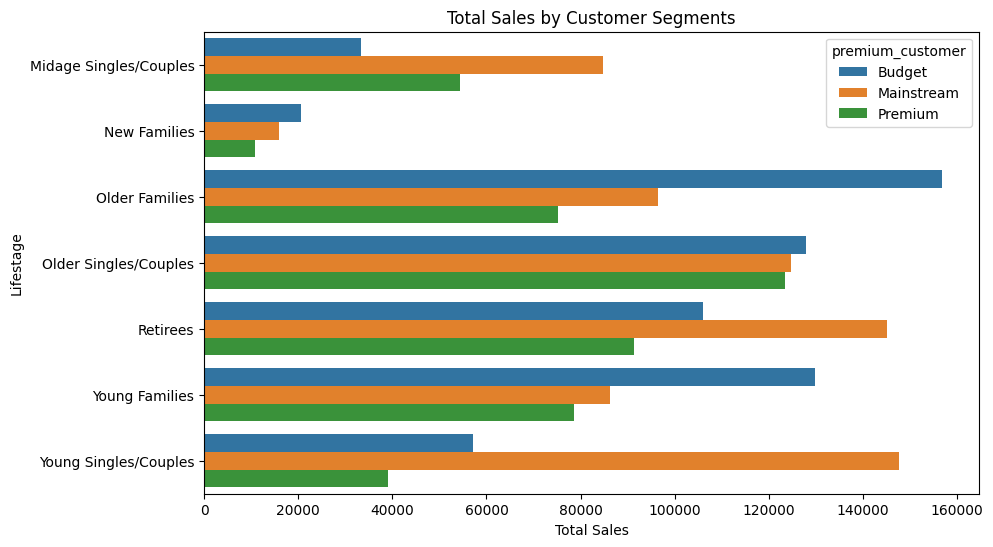

In [ ]:
# Create a bar plot of sales by customer segments
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='lifestage', hue='premium_customer', data=sales_by_customer)

# Add labels and title
plt.xlabel('Total Sales')
plt.ylabel('Lifestage')
plt.title('Total Sales by Customer Segments')

# Show the plot
plt.show()


*Sales are coming mainly from Budget - older families, Mainstream - young  singles/couples, and Mainstream - retirees*




Let’s see if the higher sales are due to there being more customers who buy chips.





In [ ]:
# group data by premium customer and lifestage and count unique customers
customer_count = merged_df.groupby(['premium_customer', 'lifestage'])['loyalty_card_number'].nunique().reset_index()
print(customer_count)


   premium_customer               lifestage  loyalty_card_number
0            Budget  Midage Singles/Couples                 1474
1            Budget            New Families                 1087
2            Budget          Older Families                 4611
3            Budget   Older Singles/Couples                 4849
4            Budget                Retirees                 4385
5            Budget          Young Families                 3953
6            Budget   Young Singles/Couples                 3647
7        Mainstream  Midage Singles/Couples                 3298
8        Mainstream            New Families                  830
9        Mainstream          Older Families                 2788
10       Mainstream   Older Singles/Couples                 4858
11       Mainstream                Retirees                 6358
12       Mainstream          Young Families                 2685
13       Mainstream   Young Singles/Couples                 7917
14          Premium  Mida

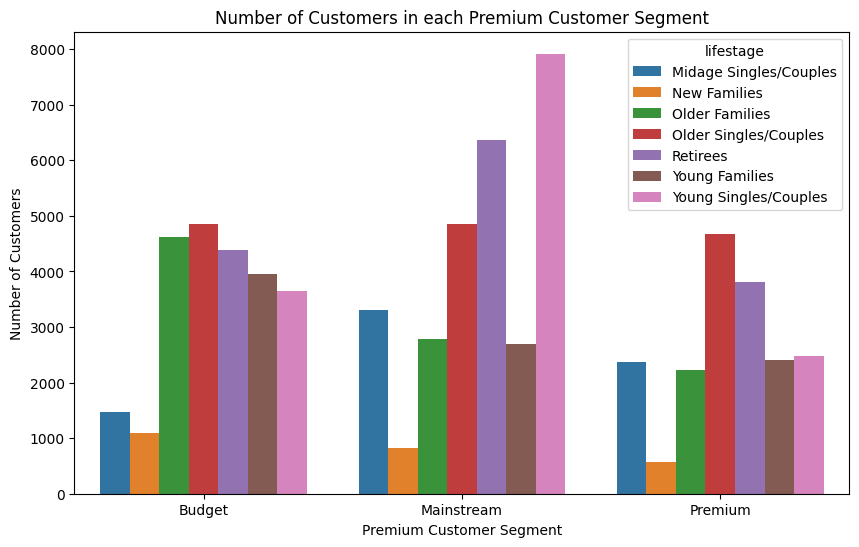

In [ ]:

# plot a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='premium_customer', y='loyalty_card_number', hue='lifestage', data=customer_count)

# add chart labels and title
plt.title('Number of Customers in each Premium Customer Segment')
plt.xlabel('Premium Customer Segment')
plt.ylabel('Number of Customers')

plt.show()



There are more *Mainstream - young singles/couples* and *Mainstream - retirees* who buy chips. This contributes to there being more sales to these customer segments, but this is not a major driver for the *Budget - Older families*' segment.

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [ ]:
# Calculate average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = merged_df.groupby(['lifestage', 'premium_customer']).agg({'product_quantity': 'sum', 'loyalty_card_number': 'nunique'}).reset_index()
avg_units['AVG'] = avg_units['product_quantity'] / avg_units['loyalty_card_number']
avg_units = avg_units[['lifestage', 'premium_customer', 'AVG']].sort_values('AVG', ascending=False)

avg_units

,lifestage,premium_customer,AVG
7,Older Families,Mainstream,9.255380
6,Older Families,Budget,9.076773
8,Older Families,Premium,9.071717
15,Young Families,Budget,8.722995
17,Young Families,Premium,8.716013
16,Young Families,Mainstream,8.638361
9,Older Singles/Couples,Budget,6.781398
11,Older Singles/Couples,Premium,6.769543
10,Older Singles/Couples,Mainstream,6.712021
1,Midage Singles/Couples,Mainstream,6.432080


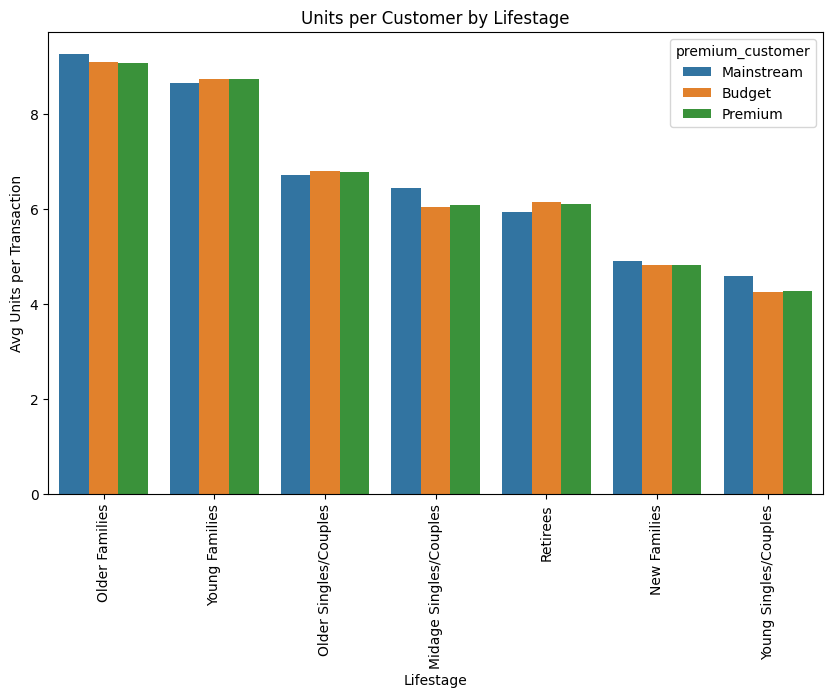

In [ ]:

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(x='lifestage', y='AVG', hue='premium_customer', data=avg_units, dodge=True)
plt.title('Units per Customer by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Avg Units per Transaction')
plt.xticks(rotation=90)
plt.show()


*Older families* and *young families *in general buy more chips per transactons.

Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [ ]:
# Calculate the average price per unit for each transaction:
merged_df['price_per_unit'] = merged_df['total_sales'] / merged_df['product_quantity']

# Calculate the mean price per unit for each customer segment:
average_price_by_customer = merged_df.groupby(['lifestage', 'premium_customer'])['price_per_unit'].mean().reset_index()

average_price_by_customer

,lifestage,premium_customer,price_per_unit
0,Midage Singles/Couples,Budget,3.743328
1,Midage Singles/Couples,Mainstream,3.994241
2,Midage Singles/Couples,Premium,3.770698
3,New Families,Budget,3.917688
4,New Families,Mainstream,3.916133
5,New Families,Premium,3.872110
6,Older Families,Budget,3.745340
7,Older Families,Mainstream,3.737077
8,Older Families,Premium,3.717000
9,Older Singles/Couples,Budget,3.882096


<Figure size 1000x600 with 0 Axes>

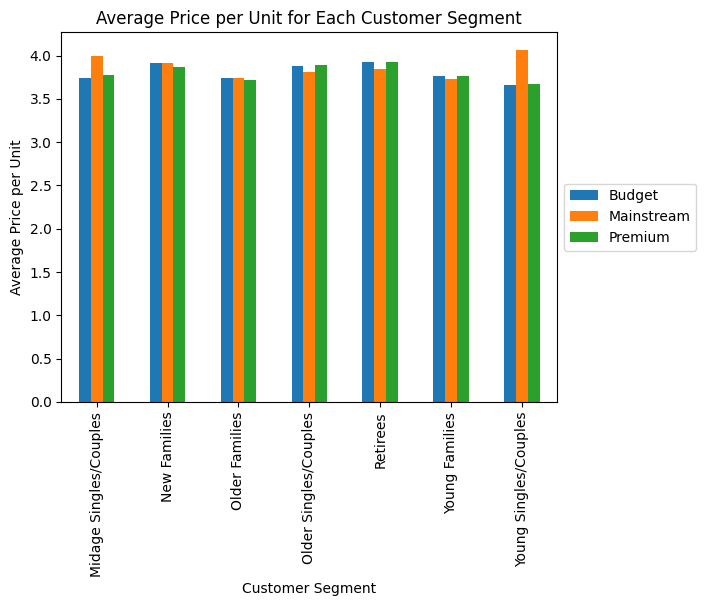

In [ ]:
# Create a pivot table with lifestage as rows, premium_customer as columns, and average_price_per_unit as values
pivot_table = average_price_by_customer.pivot(index='lifestage', columns='premium_customer', values='price_per_unit')

# Plot the pivot table as a bar chart
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar')

# Add a title and axis labels
plt.title('Average Price per Unit for Each Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Price per Unit')

# Adjust legend location
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()


The *Mainstream - midage single/couples* and *young singles/couples* are more willing to pay more per packet of chips compared to their budget and *Premium* counterparts. This may be due to *Premium* shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer *Premium - midage single/couples* and *young singles/couples* buying chips compared to their *Mainstream *counterparts.

As the difference in average price per unit isn't large, we can check if this 
difference is statistically different. So lets Perform an independent t-test between mainstream vs premium and budget midage single/couples and young singles/couples


In [ ]:
# Perform independent t-test for midage singles/couples and young singles/couples
# Calculate price per unit
merged_df['price'] = merged_df['total_sales'] / merged_df['product_quantity']

from scipy.stats import ttest_ind

# Subset the data
ms_young_midage = merged_df[(merged_df['lifestage'].isin(['Young Singles/Couples', 'Midage Singles/Couples']))
                       & (merged_df['premium_customer'] == 'Mainstream')]

pb_young_midage = merged_df[(merged_df['lifestage'].isin(['Young Singles/Couples', 'Midage Singles/Couples']))
                       & ~(merged_df['premium_customer'] == 'Mainstream')]

# Conduct Welch's t-test
t_stat, p_val = ttest_ind(ms_young_midage['price'], pb_young_midage['price'], equal_var=False, alternative='greater')

# Calculate degrees of freedom
df = ((ms_young_midage['price'].var()/ms_young_midage['price'].count()) + (pb_young_midage['price'].var()/pb_young_midage['price'].count()))**2 /      \
                                         (((ms_young_midage['price'].var()/ms_young_midage['price'].count())**2 / (ms_young_midage['price'].count()-1)) + ((pb_young_midage['price'].var() / 
                                            pb_young_midage['price'].count())**2 / (pb_young_midage['price'].count()-1)))

# Calculate 95% confidence interval
diff_means = ms_young_midage['price'].mean() - pb_young_midage['price'].mean()
se_diff = (ms_young_midage['price'].var()/ms_young_midage['price'].count() + pb_young_midage['price'].var()/pb_young_midage['price'].count())**0.5
lower_ci, upper_ci = diff_means + 1.96 * se_diff, float('inf')

print('T-statistic:', t_stat)
print('Degrees of freedom:', df)
print('P-value:', p_val)
print('95% Confidence interval:', (lower_ci, upper_ci))
print('Sample means:', ms_young_midage['price'].mean(), pb_young_midage['price'].mean())


T-statistic: 37.6243885962296
Degrees of freedom: 54791.09392740315
P-value: 3.4836771164959915e-306
95% Confidence interval: (0.35065717795821616, inf)
Sample means: 4.039785893795489 3.706491319964082


The t-test results indicate that the P-value is less than 0.05 (specifically, 3.4836771164959915e-306), which means that the unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium, young and midage singles and couples.

## Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into. 
We might want to target customer segments that contribute the most to sales to 
retain them or further increase sales. Let's look at Mainstream - young 
singles/couples. For instance, let's find out if they tend to buy a particular 
brand of chips.


In [ ]:
# Deep dive into Mainstream, young singles/couples
segment1 = merged_df[(merged_df['lifestage'] == 'Young Singles/Couples') & (merged_df['premium_customer'] == 'Mainstream')]

other = merged_df[~((merged_df['lifestage'] == 'Young Singles/Couples') & (merged_df['premium_customer'] == 'Mainstream'))]

# Brand affinity compared to the rest of the population
quantity_segment1 = segment1['product_quantity'].sum()
quantity_other = other['product_quantity'].sum()

quantity_segment1_by_brand = segment1.groupby('brand_name').agg(targetSegment=('product_quantity', 'sum')).reset_index()

quantity_other_by_brand = other.groupby('brand_name').agg(other=('product_quantity', 'sum')).reset_index()

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='brand_name')

brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

brand_proportions.sort_values(by='affinityToBrand', ascending=False)


,brand_name,targetSegment,other,affinityToBrand
18,Tyrrells,1143,11155,0.102465
17,Twisties,1673,16445,0.101733
5,Doritos,4447,43884,0.101335
9,Kettle,7172,71879,0.099779
16,Tostitos,1645,16489,0.099763
11,Pringles,4326,43693,0.099009
4,Cobs,1617,16954,0.095376
8,Infuzions,2343,24776,0.094567
15,Thins,2187,24742,0.088392
7,Grainwaves,1185,13541,0.087512


We can see that :
- *Mainstream -  young singles/couples* are 23% more likely to purchase ***Tyrrells*** chips compared to the rest of the population.
- *Mainstream - young singles/couples* are 56% less likely to purchase ***Burger*** Rings compared to the rest of the population. 

Let’s also find out if our target segment tends to buy larger packs of chips.


In [ ]:
# Deep dive into Mainstream, young singles/couples
quantity_segment1_by_pack = segment1.groupby('pack_size').agg({'product_quantity': 'sum'})
quantity_segment1_by_pack.rename(columns={'product_quantity': 'targetSegment'}, inplace=True)
quantity_segment1_by_pack['targetSegment'] /= quantity_segment1_by_pack['targetSegment'].sum()

quantity_other_by_pack = other.groupby('pack_size').agg({'product_quantity': 'sum'})
quantity_other_by_pack.rename(columns={'product_quantity': 'other'}, inplace=True)
quantity_other_by_pack['other'] /= quantity_other_by_pack['other'].sum()

pack_proportions = quantity_segment1_by_pack.join(quantity_other_by_pack)
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

pack_proportions.sort_values(by='affinityToPack', ascending=False, inplace=True)

print(pack_proportions)


           targetSegment     other  affinityToPack
pack_size                                         
270             0.031829  0.025096        1.268287
380             0.032160  0.025584        1.257030
330             0.061284  0.050162        1.221717
134             0.119420  0.100635        1.186670
110             0.106280  0.089791        1.183637
210             0.029124  0.025121        1.159318
135             0.014769  0.013075        1.129511
250             0.014355  0.012781        1.123166
170             0.080773  0.080986        0.997370
150             0.157598  0.163421        0.964372
175             0.254990  0.270007        0.944382
165             0.055652  0.062268        0.893757
190             0.007481  0.012442        0.601271
180             0.003589  0.006067        0.591538
160             0.006404  0.012373        0.517616
90              0.006349  0.012580        0.504698
125             0.003009  0.006037        0.498442
200             0.008972  0.018

It looks like *Mainstream - young singles/couples* are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let's dive into what brands sell this pack size.

In [ ]:
merged_df[merged_df['pack_size'] == 270]['product_name'].unique()


array(['Twisties Cheese      ', 'Twisties Chicken '], dtype=object)

It appears that the Larger pack size of 270g is only offered by ***Twisties***, which may explain why the target segment has a higher affinity towards this pack size. This could indicate a higher likelihood of the target segment purchasing ***Twisties*** over other brands.

## Conclusion

Sales have mainly been due to *Budget - older families*, *Mainstream - young* *singles/couples*, and *Mainstream - retirees shoppers*. We found that the high spend in chips for *Mainstream - young singles/couples and retirees* is due to there being more of them than other buyers. *Mainstream - midage and young singles/couples* are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.

We've also found that *Mainstream - young singles/couples* are 23% more likely to purchase ***Tyrrells*** chips compared to the rest of the population. The Category Manager may want to increase the category's performance by off locating some ***Tyrrells*** and smaller packs of chips in discretionary space near segments where young singles/couples are frequent more often to increase visibility and impulse behaviour.

Quantium can help the Category Manager with recommendations of where these segments are and further help them with measuring the impact of the changed placement. We’ll work on measuring the impact of trials in the next task and putting all these together in the third task.